# 最新Juliaチュートリアル

2017/08/22 @JuliaTokyo #7 (https://juliatokyo.connpass.com/event/62233/)

# 今日の話

概要
- Juliaとは?
- Juliaの基礎知識
- Juliaの実行モデル
- 今後の動向

目的
- 構文や基本的な機能を理解する
- 実行の仕方を理解し、高速なプログラムが書けるようになる
- 最新の動向にキャッチアップする

# 自己紹介

<img src="figure/github.png">

https://github.com/bicycle1885

# Juliaとは?

科学技術計算を目的として作られた動的プログラミング言語

- 数値計算用の豊富な標準ライブラリ
- `for`ループが超速い
- 平易な構文・シンプルな言語機能
- CやFortranとの連携が容易
- オープンソース (MITライセンス)

http://julialang.org

<img src="figure/funjulia.png" style="width: 300px;">

## Hello, PCA!

In [1]:
function pca(X)
    X̄ = X .- mean(X, 1)
    U, Σ, V = svd(X̄)
    return X̄ * V
end

pca (generic function with 1 method)

In [2]:
iris = readcsv("iris.csv", header=true)[1]
X = convert(Matrix{Float64}, iris[:,1:4])

150×4 Array{Float64,2}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮                 
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [3]:
X_pca = pca(X)

150×4 Array{Float64,2}:
 -2.68413  -0.319397    0.0279148   0.00226244
 -2.71414   0.177001    0.210464    0.0990266 
 -2.88899   0.144949   -0.0179003   0.0199684 
 -2.74534   0.318299   -0.0315594  -0.0755758 
 -2.72872  -0.326755   -0.0900792  -0.0612586 
 -2.28086  -0.74133    -0.168678   -0.0242009 
 -2.82054   0.0894614  -0.257892   -0.0481431 
 -2.62614  -0.163385    0.0218793  -0.0452979 
 -2.88638   0.578312   -0.0207596  -0.0267447 
 -2.67276   0.113774    0.197633   -0.0562954 
 -2.50695  -0.645069    0.075318   -0.0150199 
 -2.61276  -0.0147299  -0.10215    -0.156379  
 -2.78611   0.235112    0.206844   -0.00788791
  ⋮                                           
  1.16933   0.16499    -0.281836    0.0204618 
  2.10761  -0.372288   -0.0272911   0.210622  
  2.31415  -0.183651   -0.322694    0.277654  
  1.92227  -0.409203   -0.113587    0.505305  
  1.41524   0.574916   -0.296323   -0.0153047 
  2.56301  -0.277863   -0.29257     0.0579127 
  2.41875  -0.304798   -0.504483    

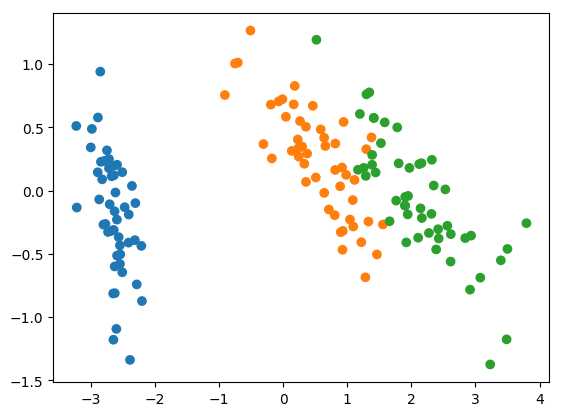

In [4]:
using PyPlot
species = iris[:,5]
cmap = Dict(s => "C$(i-1)" for (i, s) in enumerate(unique(species)))
scatter(X_pca[:,1], X_pca[:,2], c=getindex.(cmap, species));

## 数値計算への強さ

**多次元配列**を標準搭載
- 任意次元の配列
- ブロードキャスト
- 平均・分散・中央値など統計量の計算関数

**高速な数値計算ライブラリ**を標準搭載
- OpenBLAS: 各アーキテクチャに最適化された行列計算ライブラリ
- LAPACK: 行列分解など線型方程式を扱うライブラリ
- DSFMT: 高速なメルセンヌ・ツイスター擬似乱生成器

In [5]:
srand(1234);

In [6]:
rand(3)  # 1次元配列

3-element Array{Float64,1}:
 0.590845
 0.766797
 0.566237

In [7]:
rand(3, 3)  # 2次元配列

3×3 Array{Float64,2}:
 0.460085  0.200586  0.579672 
 0.794026  0.298614  0.648882 
 0.854147  0.246837  0.0109059

In [8]:
rand(3, 3, 3)  # 3次元配列

3×3×3 Array{Float64,3}:
[:, :, 1] =
 0.066423  0.112486  0.0566425
 0.956753  0.276021  0.842714 
 0.646691  0.651664  0.950498 

[:, :, 2] =
 0.96467   0.82116    0.314926
 0.945775  0.0341601  0.12781 
 0.789904  0.0945445  0.374187

[:, :, 3] =
 0.931115  0.0118196  0.732   
 0.438939  0.0460428  0.299058
 0.246862  0.496169   0.449182

In [9]:
A = randn(4, 2)
B = randn(2, 3)
A * B  # 行列積

4×3 Array{Float64,2}:
 0.9481     1.22519   1.05156 
 1.40751    1.71371   0.97805 
 0.561272   0.733818  0.669705
 0.0696456  0.112251  0.200629

In [10]:
rank(A * B)

2

In [11]:
U, Σ, V = svd(A * B);  # 特異値分解

In [12]:
U

4×3 Array{Float64,2}:
 -0.571725    0.532279   0.619488
 -0.740511   -0.643106  -0.146947
 -0.347219    0.4311    -0.621254
 -0.0649046   0.342412  -0.45682 

In [13]:
Σ

3-element Array{Float64,1}:
 3.26033    
 0.332009   
 2.64666e-16

In [14]:
V

3×3 Array{Float64,2}:
 -0.547103  -0.405747   0.732153
 -0.684464  -0.286656  -0.670326
 -0.481859   0.86787    0.120889

欧米を中心に、数値計算の授業でもJuliaが使われている: https://julialang.org/teaching/

## forループも速い

ユーザーの声

- https://twitter.com/sammy_suyama/status/899271832234151937
- https://twitter.com/genkuroki/status/899171709839745024
- https://twitter.com/tkf/status/804218261248176128
- https://twitter.com/antiplastics/status/874982350509047808
- https://twitter.com/bicycle1885/status/879493129933438976

※ 個人の感想です

In [15]:
function add(x, y)
    output = similar(x)
    @inbounds for i in 1:endof(x)
        output[i] = x[i] + y[i]
    end
    return output
end

add (generic function with 1 method)

In [16]:
x = randn(100_000);
y = randn(100_000);

In [17]:
x + y
for _ in 1:5
    @time x + y
end

  0.000422 seconds (2 allocations: 781.328 KiB)
  0.000421 seconds (2 allocations: 781.328 KiB)
  0.000391 seconds (2 allocations: 781.328 KiB)
  0.000425 seconds (2 allocations: 781.328 KiB)
  0.000396 seconds (2 allocations: 781.328 KiB)


In [18]:
add(x, y)
for _ in 1:5
    @time add(x, y)
end

  0.000102 seconds (2 allocations: 781.328 KiB)
  0.000107 seconds (2 allocations: 781.328 KiB)
  0.000096 seconds (2 allocations: 781.328 KiB)
  0.000095 seconds (2 allocations: 781.328 KiB)
  0.000085 seconds (2 allocations: 781.328 KiB)


In [19]:
using PyCall

In [20]:
PyCall.pyversion

v"3.5.2"

In [21]:
py"""
import numpy as np

def add(x, y):
    output = np.empty(x.shape)
    for i in range(len(x)):
        output[i] = x[i] + y[i]
    return output
"""

In [22]:
@time py"add($(x), $(y))"o;

  0.042147 seconds (2.01 k allocations: 115.593 KiB)


In [23]:
using BenchmarkTools

In [24]:
versioninfo()

Julia Version 0.6.0
Commit 903644385b* (2017-06-19 13:05 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin16.6.0)
  CPU: Intel(R) Core(TM) i5-6267U CPU @ 2.90GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas64_
  LIBM: libopenlibm
  LLVM: libLLVM-3.9.1 (ORCJIT, skylake)


In [25]:
b1 = @benchmark x + y

BenchmarkTools.Trial: 
  memory estimate:  781.33 KiB
  allocs estimate:  2
  --------------
  minimum time:     68.681 μs (0.00% GC)
  median time:      88.255 μs (0.00% GC)
  mean time:        292.863 μs (20.06% GC)
  maximum time:     7.429 ms (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [26]:
# FLOPS
100_000 / (minimum(b1).time / 10^9)

1.4560067558713472e9

In [27]:
b2 = @benchmark add(x, y)

BenchmarkTools.Trial: 
  memory estimate:  781.33 KiB
  allocs estimate:  2
  --------------
  minimum time:     67.934 μs (0.00% GC)
  median time:      88.332 μs (0.00% GC)
  mean time:        294.045 μs (20.40% GC)
  maximum time:     12.368 ms (94.90% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [28]:
# FLOPS
100_000 / (minimum(b2).time / 10^9)

1.472016957635352e9

In [29]:
judge(minimum(b1), minimum(b2))

BenchmarkTools.TrialJudgement: 
  time:   +1.10% => invariant (5.00% tolerance)
  memory: +0.00% => invariant (1.00% tolerance)

## 速さの秘密

主に２つの要素
- **型推論**による実行時の曖昧性の排除
- **LLVM**によるネイティブコードへの変換

これらにより他の動的言語では実現が難しいほどの最適化ができる

<img src="figure/codegen.png">

`add(x, y)`の型推論の結果

In [30]:
@code_typed add(x, y)

CodeInfo(:(begin 
        $(Expr(:inbounds, false))
        # meta: location array.jl similar 189
        SSAValue(3) = (Base.arraysize)(x, 1)::Int64
        # meta: pop location
        $(Expr(:inbounds, :pop))
        output = $(Expr(:foreigncall, :(:jl_alloc_array_1d), Array{Float64,1}, svec(Any, Int64), Array{Float64,1}, 0, SSAValue(3), 0)) # line 3:
        $(Expr(:inbounds, true))
        $(Expr(:inbounds, false))
        # meta: location abstractarray.jl endof 134
        $(Expr(:inbounds, false))
        # meta: location abstractarray.jl linearindices 99
        # meta: location abstractarray.jl indices1 71
        # meta: location abstractarray.jl indices 64
        SSAValue(7) = (Base.arraysize)(x, 1)::Int64
        # meta: pop location
        # meta: pop location
        # meta: pop location
        $(Expr(:inbounds, :pop))
        # meta: pop location
        $(Expr(:inbounds, :pop))
        SSAValue(8) = (Base.select_value)((Base.slt_int)(SSAValue(7), 0)::Bool, 0, SSAValu

LLVMによるネイティブコードへの変換

In [31]:
@code_native add(x, y)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[15]
	pushq	%rbp
	movq	%rsp, %rbp
	pushq	%r15
	pushq	%r14
	pushq	%rbx
	subq	$40, %rsp
	movq	%rsi, %r15
	movq	%rdi, %rbx
	movabsq	$jl_get_ptls_states_fast, %rax
	callq	*%rax
	movq	%rax, %r14
	vxorpd	%xmm0, %xmm0, %xmm0
	vmovupd	%xmm0, -40(%rbp)
	movq	$4, -56(%rbp)
	movq	(%r14), %rax
	movq	%rax, -48(%rbp)
	leaq	-56(%rbp), %rax
	movq	%rax, (%r14)
Source line: 189
	movq	24(%rbx), %rsi
Source line: 2
	movabsq	$jl_alloc_array_1d, %rax
	leaq	81478800(%rax), %rdi
	callq	*%rax
	movq	%rax, -40(%rbp)
Source line: 64
	movq	24(%rbx), %rcx
Source line: 3
	testq	%rcx, %rcx
	jle	L354
Source line: 4
	movq	(%rbx), %r9
	movq	(%r15), %r10
	movq	(%rax), %r11
	movl	$1, %r15d
Source line: 3
	cmpq	$8, %rcx
	jb	L290
	movq	%rcx, %r8
	movl	$1, %r15d
	andq	$-8, %r8
	je	L290
	leaq	(%r11,%rcx,8), %rsi
	leaq	(%r9,%rcx,8), %rdx
	leaq	(%r10,%rcx,8), %rdi
	cmpq	%rdx, %r11
	sbbb	%dl, %dl
	cmpq	%rsi, %r9
	sbbb	%bl, %bl
	andb	%dl, %bl
	cmpq	%rdi, %r11
	sbbb	%dl

ネイティブコードはCPUで直接実行されるので、仮想マシン(VM)を使う他のインタプリター方式の言語より高速

# Juliaの基礎知識

もうちょっと包括的な日本語のチュートリアル➥ https://github.com/bicycle1885/Julia-Tutorial

## 基本構文 - 分岐

In [32]:
x = rand([-1, 0, 1])

if x > 0
    println("positive!")
elseif x == 0
    println("zero!")
else
    println("negative!")
end

zero!


## 基本構文 - 反復

In [33]:
for i in 1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


In [34]:
while true
    r = rand()
    @show r
    if r < 0.05
        break
    end
end

r = 0.824963896731119
r = 0.3864837619109138
r = 0.19716180707125286
r = 0.4707863823067948
r = 0.9122340342619175
r = 0.27714398262365547
r = 0.40275437809947934
r = 0.12027556668360484
r = 0.09447130478733246
r = 0.24197683192547736
r = 0.8619030597650075
r = 0.5945882942644753
r = 0.49438472096360275
r = 0.49150286529392995
r = 0.39888971732793155
r = 0.04482709506506044


## 基本構文 - 関数定義

In [35]:
# functioを使う関数定義
function hello(name)
    return "hello, $(name)!"
end

hello (generic function with 1 method)

In [36]:
# 1行関数定義
hello(name) = "hello, $(name)!!"

hello (generic function with 1 method)

In [37]:
# 引数の型制約付き
function hello(name::AbstractString)
    return "hello, $(name)!!!"
end

hello (generic function with 2 methods)

In [38]:
# 引数と返り値の型制約付き
function hello(name::AbstractString)::String
    return "hello, $(name)!!!!"
end

hello (generic function with 2 methods)

## Juliaの型

In [39]:
# nothingの型
Void

Void

In [40]:
typeof(nothing)

Void

In [41]:
# 真偽型
Bool

Bool

In [42]:
typeof(true)

Bool

In [43]:
# 符号付き整数
Int8, Int16, Int32, Int64, Int128

(Int8, Int16, Int32, Int64, Int128)

In [44]:
typeof(1)

Int64

In [45]:
# 符号無し整数
UInt8, UInt16, UInt32, UInt64, UInt128

(UInt8, UInt16, UInt32, UInt64, UInt128)

In [46]:
typeof(0x0000000000000001)

UInt64

In [47]:
# エイリアス
Int == Int64

true

In [48]:
# エイリアス
UInt == UInt64

true

In [49]:
# 浮動小数点数
Float16, Float32, Float64

(Float16, Float32, Float64)

In [50]:
typeof(1.0)

Float64

In [51]:
# 文字
Char

Char

In [52]:
typeof('a')

Char

リテラルによる型の違い

In [53]:
typeof(1)

Int64

In [54]:
typeof(0x01)

UInt8

In [55]:
typeof(0x0001)

UInt16

In [56]:
typeof(1.0)

Float64

文字列

In [57]:
String

String

In [58]:
"abracadabra"

"abracadabra"

In [59]:
"アブラカダブラ"

"アブラカダブラ"

配列

In [60]:
Array

Array

In [61]:
# 1次元配列 (ベクトルとも言う)
[1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [62]:
# 2次元配列 (行列とも言う)
[1 2 3
 4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

JuliaにPythonでいう`list`型はないが、1次元配列がその代わり

集合

In [63]:
Set

Set

In [64]:
Set([1, 2, 3])

Set([2, 3, 1])

辞書

In [65]:
Dict

Dict

In [66]:
Dict("one" => 1, "two" => 2)

Dict{String,Int64} with 2 entries:
  "two" => 2
  "one" => 1

`Nullable`型

In [67]:
Nullable

Nullable

In [68]:
Nullable(1)

Nullable{Int64}(1)

In [69]:
Nullable{Int64}()

Nullable{Int64}()

## 抽象型

`Int64`など具体型をまとめる型

In [70]:
Int

Int64

In [71]:
supertype(Int)

Signed

In [72]:
supertype(supertype(Int))

Integer

In [73]:
supertype(supertype(supertype(Int)))

Real

In [74]:
supertype(supertype(supertype(supertype(Int))))

Number

In [75]:
supertype(supertype(supertype(supertype(supertype(Int)))))

Any

In [76]:
supertype(supertype(supertype(supertype(supertype(supertype(Int))))))

Any

抽象型`AbstractMatrix`のサブタイプ

In [77]:
subtypes(AbstractMatrix)

21-element Array{Union{DataType, UnionAll},1}:
 AbstractSparseArray{Tv,Ti,2} where Ti where Tv                                                                                                               
 Base.LinAlg.AbstractTriangular                                                                                                                               
 Base.LinAlg.HessenbergQ                                                                                                                                      
 Base.LinAlg.LQPackedQ                                                                                                                                        
 Base.LinAlg.QRCompactWYQ                                                                                                                                     
 Base.LinAlg.QRPackedQ                                                                                                                                        

## パラメトリック型

型パラメーターを取る型

In [78]:
Array

Array

In [79]:
Array{Int}

Array{Int64,N} where N

In [80]:
Array{Int,1}

Array{Int64,1}

In [81]:
Array{Int,2}

Array{Int64,2}

In [82]:
typeof([1,2,3])

Array{Int64,1}

In [83]:
typeof([1 2 3; 4 5 6])

Array{Int64,2}

In [84]:
d = Dict("one" => 1, "two" => 2)

Dict{String,Int64} with 2 entries:
  "two" => 2
  "one" => 1

In [85]:
typeof(d)

Dict{String,Int64}

## 型定義

In [86]:
struct User
    name::String
    registerdate::Date
end

In [87]:
jeff = User("Jeff Bezanson", Date(2010, 3, 4))

User("Jeff Bezanson", 2010-03-04)

In [88]:
jeff.name

"Jeff Bezanson"

In [89]:
jeff.registerdate

2010-03-04

In [90]:
jeff.name = "Stefan Karpinski"

LoadError: [91mtype User is immutable[39m

In [91]:
mutable struct MutableUser
    name::String
    registerdate::Date
end

In [92]:
viral = MutableUser("Viral Shah", Date(2013, 10, 2))

MutableUser("Viral Shah", 2013-10-02)

In [93]:
viral.name

"Viral Shah"

In [94]:
viral.name = "Alan Edelman"

"Alan Edelman"

In [95]:
viral

MutableUser("Alan Edelman", 2013-10-02)

## 多重ディスパッチ

関数`+`には180を超えるメソッドが定義されている

In [96]:
+

+ (generic function with 185 methods)

In [97]:
methods(+)

In [ ]:
methodswith(Int, +)

In [ ]:
1 + 1

In [ ]:
struct Point{T}
    x::T
    y::T
end

In [ ]:
Base.:(+)(p::Point, q::Point) = Point(p.x + q.x, p.y + q.y)

In [ ]:
+

In [ ]:
p = Point(1, 2)
q = Point(-2, 4)

In [ ]:
p + q

In [ ]:
p + 1

In [ ]:
Base.:(+)(p::Point, d::Real) = Point(p.x + d, p.y + d)

In [ ]:
p + 1

In [ ]:
Base.:(*)(p::Point, s::Real) = Point(p.x * s, p.y * s)

In [ ]:
p * 3

In [ ]:
(p + 1) * 3 == p * 3 + 3

In [ ]:
function distance(p::Point)
    return sqrt(p.x^2 + p.y^2)
end

In [ ]:
distance(p)

In [ ]:
function Base.:(+)(p::Point, n::Integer)
    println("You called Point + Integer!")
    return Point(p.x + n, p.y + n)
end

In [ ]:
p + 1

In [ ]:
p + 1.0

In [ ]:
function move_right(p::Point)
    return p + Point(1, 0)
end

In [ ]:
p

In [ ]:
move_right(p)

多重ディスパッチのポイント

- すべての引数の扱いは平等 (右も左もない)
- メソッドのうち、型が一番良く合うものが実際に呼ばれる

## C言語との連携

`ccall`でC言語の関数を呼び出せる

In [ ]:
# https://www.gnu.org/software/libc/manual/html_node/Trig-Functions.html
ccall((:sin, "libc"), Cdouble, (Cdouble,), π/2)

In [ ]:
# https://www.gnu.org/software/libc/manual/html_node/Environment-Access.html
unsafe_string(ccall((:getenv, "libc"), Cstring, (Cstring,), "SHELL"))

JuliaとCの構造体はメモリレイアウトの互換性があるので、互いに読み書きできる。具体例は以下のパッケージを参照
- https://github.com/bicycle1885/CodecZlib.jl/blob/master/src/libz.jl
- https://github.com/bicycle1885/EzXML.jl/blob/master/src/node.jl

## ブロードキャスト

スカラーや配列を同じ形に揃えて、要素毎の演算をすること。

In [ ]:
x = [1,2,3]; y = [4,5,6]

In [ ]:
# スカラー倍 (ブロードキャストとは言わない)
x * 3

In [ ]:
# ベクトル和 (ブロードキャストとは言わない)
x + y

In [ ]:
# 要素毎の積 (ブロードキャスト)
x .* 3

In [ ]:
# 要素毎の和 (ブロードキャスト)
x .+ y

列ベクトルと列ベクトルの積は計算できない

In [ ]:
x * y

ブロードキャストを使えば要素毎の積なら計算できる

In [ ]:
x .* y

列ベクトルと行ベクトルの和は計算できない

In [ ]:
x + y'

ブロードキャストはできる

In [ ]:
x .+ y'

In [ ]:
A = [
    1 2
    3 4
    5 6
]

行列と列ベクトルの和は計算できない

In [ ]:
A + x

ブロードキャストはできる

In [ ]:
A .+ x

## マクロ

- 関数では実現できない、コードの操作ができる
- Cのマクロとは異なるLispから受け継いだマクロ

In [ ]:
x = -3

In [ ]:
@show x;

In [ ]:
@assert x > 0

標準ライブラリで提供されているマクロは何種類かに分けられる。

1. 開発支援系: `@show`, `@less`, `@which`, `@code_warntype`, etc.
2. 特殊構文系: `@assert`, `@goto`, `@label`, `@async`, `@parallel`, etc.
3. コンパイラヒント系: `@inbounds`, `@inline`, `@fastmath`, etc.
4. メタデータ系: `@__DIR__`, `@__FILE__`, etc.
5. 非標準文字列系: `@r_str`, `@ip_str`, `@v_str`, etc.

In [ ]:
ismatch(r"0x[0-9A-Fa-f]{2}", "0x3F")

# Juliaの実行モデル

- Juliaの実行モデルを理解することは速いコードを書く上で非常に重要
- Juliaはちょっと特殊な実行の仕方をするので、最初は少し戸惑う

## Juliaは本当に速い?

答: 速い

現時点でC/C++より遅くなりそうなケース
- マルチスレッドプログラミング (理由: Juliaのマルチスレッドサポートが弱い)
- 細かいSIMDを使ったプログラミング (理由: x86のSIMD intrinsicsがない)

これ以外のケースでは、バグでないJuliaの制約でパフォーマンスが出なかったことは体験してない(個人の感想です)。

希望の光
- より柔軟なマルチスレッドのサポートが開発中 (https://github.com/JuliaLang/julia/pull/22631)
- `llvmcall`命令で細かいSIMDの制御もできないことはない? (https://github.com/eschnett/SIMD.jl)

具体例: Base64のデコーダー

64+1種類のASCII文字を使ってエンコードされたバイナリデータを元のデータに復元する。

ポイント
- 4バイトのASCII文字列にエンコードされたデータを3バイトのバイナリに変換
- 特定の文字の無視・パディングの処理などがあり、それなりに複雑
- 表引きによるアルゴリズム

```julia
function TranscodingStreams.process(
        codec  :: Base64Decoder,
        input  :: Memory,
        output :: Memory,
        error  :: Error)
    table = codec.table
    state = codec.state
    buffer = codec.buffer

    # Check if we can encode data.
    if !is_running(state)
        error[] = ArgumentError("decoding is already finished")
        return 0, 0, :error
    elseif output.size < 3
        # Need more output space.
        return 0, 0, :ok
    end

    # Load the frist bytes.
    i = j = 0
    while buffer.size < 3 && i < input.size
        buffer[buffer.size+=1] = input[i+=1]
    end
    c1 = c2 = c3 = c4 = BASE64_CODEIGN
    if buffer.size ≥ 1
        c1 = decode(table, buffer[1])
    end
    if buffer.size ≥ 2
        c2 = decode(table, buffer[2])
    end
    if buffer.size ≥ 3
        c3 = decode(table, buffer[3])
    end
    empty!(buffer)

    # Start decoding loop.
    status = :ok
    @inbounds while true
        if c1 > 0x3f || c2 > 0x3f || c3 > 0x3f || c4 > 0x3f
            i, j, status = decode_irregular(table, c1, c2, c3, c4, input, i, output, j, error)
        else
            output[j+1] = c1 << 2 | c2 >> 4
            output[j+2] = c2 << 4 | c3 >> 2
            output[j+3] = c3 << 6 | c4
            j += 3
        end
        if i + 4 ≤ input.size && j + 3 ≤ output.size && status == :ok
            c1 = decode(table, input[i+1])
            c2 = decode(table, input[i+2])
            c3 = decode(table, input[i+3])
            c4 = decode(table, input[i+4])
            i += 4
        else
            break
        end
    end

    # Epilogue.
    if status == :end || status == :error
        finish!(state)
    end
    return i, j, status
end

# Decode irregular code (e.g. non-alphabet, padding, etc.).
function decode_irregular(table, c1, c2, c3, c4, input, i, output, j, error)
    # Skip ignored chars.
    while true
        if c1 == BASE64_CODEIGN
            c1, c2, c3 = c2, c3, c4
        elseif c2 == BASE64_CODEIGN
            c2, c3 = c3, c4
        elseif c3 == BASE64_CODEIGN
            c3 = c4
        elseif c4 == BASE64_CODEIGN
            # pass
        else
            break
        end
        if i + 1 ≤ input.size
            c4 = decode(table, input[i+=1])
        else
            c4 = BASE64_CODEEND
            break
        end
    end

    # Write output.
    if c1 ≤ 0x3f && c2 ≤ 0x3f && c3 ≤ 0x3f && c4 ≤ 0x3f
        output[j+=1] = c1 << 2 | c2 >> 4
        output[j+=1] = c2 << 4 | c3 >> 2
        output[j+=1] = c3 << 6 | c4
        status = :ok
    elseif c1 ≤ 0x3f && c2 ≤ 0x3f && c3 ≤ 0x3f && c4 == BASE64_CODEPAD
        c4 = 0x00
        output[j+=1] = c1 << 2 | c2 >> 4
        output[j+=1] = c2 << 4 | c3 >> 2
        status = :end
    elseif c1 ≤ 0x3f && c2 ≤ 0x3f && c3 == c4 == BASE64_CODEPAD
        c3 = c4 = 0x00
        output[j+=1] = c1 << 2 | c2 >> 4
        status = :end
    elseif c1 == c2 == c3 == BASE64_CODEIGN && c4 == BASE64_CODEEND
        status = :end
    else
        error[] = ArgumentError("invalid data")
        status = :error
    end
    return i, j, status
end
```
<https://github.com/bicycle1885/CodecBase.jl/blob/master/src/base64/decoder.jl#L50-L159>


ベンチマーク

Pythonの標準ライブラリのC言語による実装より高速

Julia 0.6.0:
```
julia> sizeof(data)
286180

julia> @benchmark transcode(Base64Decoder(), data)
BenchmarkTools.Trial:
  memory estimate:  490.31 KiB
  allocs estimate:  19
  --------------
  minimum time:     372.894 μs (0.00% GC)
  median time:      561.580 μs (0.00% GC)
  mean time:        594.615 μs (6.84% GC)
  maximum time:     4.291 ms (68.99% GC)
  --------------
  samples:          8379
  evals/sample:     1

```

Python 3.5.2:
```
In [13]: len(data)
Out[13]: 286180

In [14]: %timeit base64.decodebytes(data)
1.16 ms ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

```

## 実行するまでの流れ

ユーザーがREPLに打ち込んだ処理が実行されるまでの流れ

1. コンパイラーがJuliaのソースコードをパースする
2. マクロ・構文糖衣の展開などを行う
3. 低レベルなJuliaの中間表現に落とし込む
4. 型推論を行う
5. LLVMの中間表現に落とし込む
6. ネイティブコードに落とし込む
7. 実行する

In [ ]:
# ソースコードのパース
parse("1 + 1")

In [ ]:
parse("""
function foobar(x)
    @assert x > 0
end
""")

`parse`は`Expr`のオブジェクトを返す。`Expr`は抽象構文木(AST)。

In [ ]:
expr = parse("1 + 2 * 3")

In [ ]:
dump(expr)

In [ ]:
# ifelseなどは複数のif-elseに展開される
quote
    if x < 0
        println("x is negative")
    elseif x == 0
        println("x is zero")
    else
        println("x is positive")
    end
end

In [ ]:
# マクロの展開する関数
macroexpand(expr)

In [ ]:
# @から始まるマクロはこの関数で展開される
macroexpand(:(@assert x > 0))

In [ ]:
macroexpand(quote
    function foobar(x)
        @assert x > 0
    end
end)

In [ ]:
function foobar(x)
    @assert x > 0
end

In [ ]:
# Juliaの中間表現はunlessの分岐とgotoばかりのフラットなコード
code_lowered(foobar, (Int,))

In [ ]:
function foobar(n)
    x = 0
    for i in 1:n
        x += i
    end
    return x
end

In [ ]:
# forループもunlessとgotoへ展開
code_lowered(foobar, (Int,))

In [ ]:
# Juliaの中間表現に型推論で型をつける
code_typed(foobar, (Int,))

In [ ]:
# LLVM中間表現に変換
code_llvm(foobar, (Int,))

In [ ]:
# nativeコードに変換
code_native(foobar, (Int,))

REPLにコードを打ち込むと上の処理を行う

In [ ]:
foobar(10)

## 特殊化 (specialization)

In [ ]:
function foobar(n)
    return n * 2
end

In [ ]:
@code_typed foobar(1)

In [ ]:
@code_typed foobar(1.0)

- 引数の型が異なれば、型推論の結果も違う
- 関数は引数の型の組み合わせだけ特殊化(specialize)される

In [ ]:
function foobar(n)
    if n isa Integer
        println("Integer!")
    end
    return n * 2
end

In [ ]:
foobar(1)

In [ ]:
foobar(1.0)

In [ ]:
@code_typed foobar(1)

特殊化によりprintlnが分岐ごと消えている!

In [ ]:
@code_typed foobar(1.0)

## トップレベル

In [ ]:
start_ns = time_ns()
s = 0.0
for _ in 1:1_000_000
    s += rand()
end
@show Int(time_ns() - start_ns)

In [ ]:
function loop()
    s = 0.0
    for _ in 1:1_000_000
        s += rand()
    end
    return s
end

In [ ]:
start_ns = time_ns()
s = loop()
@show Int(time_ns() - start_ns)

- 同じ計算なのに上のコードは20倍くらい遅い！
- 上のコードはトップレベルで実行されているのに対し、下のコードは関数内のループ
- トップレベルの処理はJITコンパイルされない！

使い分け:
- トップレベルでは、関数の定義や関数呼び出しを行う
- 関数内では、重い処理を行う

## 型の安定性

- Juliaの高速化は、曖昧性の少ないコードを書くこと
- 型が決定できないとき、Juliaはすごく遅くなる!

In [ ]:
function collatz1(n)
    step = 0
    while n != 1
        step += 1
        if mod(n, 2) == 0
            n /= 2
        else
            n = n * 3 + 1
        end
    end
    return step
end

In [ ]:
collatz1(10)

In [ ]:
using BenchmarkTools

In [ ]:
@benchmark for n in 1:10000; collatz1(n); end

In [ ]:
@code_typed collatz1(10)

In [ ]:
function collatz2(n)
    step = 0
    while n != 1
        step += 1
        if mod(n, 2) == 0
            n = div(n, 2)
        else
            n = n * 3 + 1
        end
    end
    return step
end

In [ ]:
collatz2(10)

In [ ]:
@benchmark for n in 1:10000; collatz2(n); end

In [ ]:
@code_warntype collatz2(10)

## メタプログラミング

- マクロを使うと、コードをコードで編集できる
- `@show`や`@assert`が標準にもあるマクロ
- もちろん自分でも定義できる

In [ ]:
macro myassert(ex)
    msg = "$(sprint(print, ex)) is not satisfied"
    quote
        if !$(ex)
            throw(AssertionError($(msg)))
        end
    end
end

In [ ]:
x = 1

In [ ]:
@myassert x > 0

In [ ]:
x = 0

In [ ]:
@myassert x > 0

具体例: 正規表現をJuliaへコンパイル

Automa.jlを使って、実行時のコード生成でどういうことができるかをデモンストレーションしてみる。

In [ ]:
import Automa
import Automa.RegExp: @re_str
const re = Automa.RegExp

oct      = re"0o[0-7]+"
dec      = re"[-+]?[0-9]+"
hex      = re"0x[0-9A-Fa-f]+"
prefloat = re"[-+]?([0-9]+\.[0-9]*|[0-9]*\.[0-9]+)"
float    = prefloat | re.cat(prefloat | re"[-+]?[0-9]+", re"[eE][-+]?[0-9]+")
number   = oct | dec | hex | float
numbers  = re.cat(re.opt(number), re.rep(re" +" * number), re" *");

In [ ]:
number.actions[:enter] = [:mark]
oct.actions[:exit]     = [:oct]
dec.actions[:exit]     = [:dec]
hex.actions[:exit]     = [:hex]
float.actions[:exit]   = [:float]

In [ ]:
actions = Dict(
    :mark  => :(mark = p),
    :oct   => :(emit(:oct)),
    :dec   => :(emit(:dec)),
    :hex   => :(emit(:hex)),
    :float => :(emit(:float)),
);

In [ ]:
machine = Automa.compile(numbers)
context = Automa.CodeGenContext(generator=:goto, clean=true)
@eval function tokenize(data::String)
    tokens = Tuple{Symbol,String}[]
    mark = 0
    $(Automa.generate_init_code(context, machine))
    p_end = p_eof = endof(data)
    emit(kind) = push!(tokens, (kind, data[mark:p-1]))
    $(Automa.generate_exec_code(context, machine, actions))
    return tokens, cs == 0 ? :ok : cs < 0 ? :error : :incomplete
end

In [ ]:
tokens, status = tokenize("1 0x0123BEEF 0o754 3.14 -1e4 +6.022045e23")
tokens

In [ ]:
write("numbers.dot", Automa.machine2dot(machine))
run(`dot -Tpng -o numbers.png numbers.dot`)
html"<img src=\"numbers.png\">"

In [ ]:
tokenize("0x")

In [ ]:
tokenize("0x1234")

In [ ]:
tokenize("0x1234G")

In [ ]:
Automa.generate_exec_code(context, machine, actions)

# 今後の動向

## Juliaの人気

TIOBE(August 2017)では46位 (https://www.tiobe.com/tiobe-index/)
- HaskellやGroovyの上
- Lua, Kotlin, Clojureよりは下

IEEE Spectrum 2017では31位 (http://spectrum.ieee.org/static/interactive-the-top-programming-languages-2017)
- Clojure, Kotlin, Groovyより上
- Haskell, Luaより下

## Juliaの開発状況

- Juliaの最新版はv0.6.0
- GitHubのスター数は9,000を超えた
- 600人以上がJulia本体にコントリビュート
- 過去1ヶ月で200以上のプルリクがマージされ、150以上のイシューがクローズされた
- 1500以上のパッケージ (打ち捨てられたものもあるが...)

## Juliaの開発体制

[NumFOCUS](https://www.numfocus.org/)の支援プロジェクトの１つ
<img src="figure/numfocus.png">

[Julia Computing Inc.](https://juliacomputing.com/)というJuliaの開発者達による企業が作られた
<img src="figure/juliacomputing.png">

## Julia 1.0?

- まだ未定だが、運が良ければ今年か、来年に出る?
- Juliaのリリースは毎回半年ぐらい遅れるので、多分来年の上旬くらいか
- Julia 1.0が出れば、とりあえず数年は安定して使えそう

入りそうな機能
- Pkg3: パッケージシステムのメジャーアップデート
    - 現在のPkg2がデカいレポジトリをガンガン書き換えながら管理するので色々問題が
    - Pkg2では、パッケージのバージョンを固定した環境などが作りにくい
    - Pkg3では、分散管理・TOMLによるバージョン固定など使いやすくなる予定
    - https://github.com/JuliaLang/Juleps/blob/master/Pkg3.md
- `NamedTuple`: 名前付きタプル
    - Juliaの`Tuple`は位置(1,2,...)で要素を指定
    - `NamedTuple`は名前でも要素を指定できるように
    - `(foo=1.0, bar="hoge")`のような構文も追加される
    - https://github.com/JuliaLang/julia/pull/22194
- `Null`値: 欠損値の扱いの向上
    - 現在`Nullable`でnullかもしれない値を表現
    - 配列とかに入れるとちょっと面倒 (いちいち`Nullable`を外さないといけない)
    - `Union{Float32,Void}`みたいなのが高速に扱えるようになる
    - https://github.com/JuliaLang/julia/pull/22441 (マージ済み)
- Parallel Task Runtime: マルチスレッド機能の本気実装
    - Juliaの同時実行できるタスクは1つだけ
    - `@threads`を使えばforループを局所的に並列実行できるが...
    - タスクを別スレッドで並列実行できるようになりそう
    - https://github.com/JuliaLang/julia/pull/22631

# (おまけ) 作ったパッケージの紹介

全部or大半のコードを書いた公式パッケージ

- [TranscodingStreams.jl](https://github.com/bicycle1885/TranscodingStreams.jl)
- [CodecZlib.jl](https://github.com/bicycle1885/CodecZlib.jl)
- [CodecBzip2.jl](https://github.com/bicycle1885/CodecBzip2.jl)
- [CodecXz.jl](https://github.com/bicycle1885/CodecXz.jl)
- [CodecZstd.jl](https://github.com/bicycle1885/CodecZstd.jl)
- [CodecBase.jl](https://github.com/bicycle1885/CodecBase.jl)
- [EzXML.jl](https://github.com/bicycle1885/EzXML.jl)
- [DocOpt.jl](https://github.com/docopt/DocOpt.jl)
- [Snappy.jl](https://github.com/bicycle1885/Snappy.jl)
- [BioCore.jl](https://github.com/BioJulia/BioCore.jl)
- [BioSymbols.jl](https://github.com/BioJulia/BioSymbols.jl)
- [BioSequences.jl](https://github.com/BioJulia/BioSequences.jl)
- [BioAlignments.jl](https://github.com/BioJulia/BioAlignments.jl)
- [GenomicFeatures.jl](https://github.com/BioJulia/GenomicFeatures.jl)
- [BGZFStreams.jl](https://github.com/BioJulia/BGZFStreams.jl)
- [Automa.jl](https://github.com/BioJulia/Automa.jl)
- [IndexableBitVectors.jl](https://github.com/BioJulia/IndexableBitVectors.jl)
- [FMIndexes.jl](https://github.com/BioJulia/FMIndexes.jl)